# Fake News Detection
This notebook implements a machine learning model to detect fake news using various classification algorithms.

In [39]:
import pandas as pd #CSV, Excel, etc.
import numpy as np #Arrays, matrices, Mathematical calculations
import matplotlib.pyplot as plt #Plot graphs, charts
import seaborn as sns #Statistical data visualization
from sklearn.model_selection import train_test_split #Used to split dataset
from sklearn.metrics import accuracy_score #Used to measure model performance
from sklearn.metrics import classification_report #Shows precision, recall, f1-score
import re #Used for regular expressions
import string #

## Import Libraries
Importing necessary Python libraries for data processing, visualization, and machine learning.

## Load Dataset
Loading the fake and true news datasets from CSV files.

In [40]:
fake_data = pd.read_csv('datasets/Fake.csv')
true_data = pd.read_csv('datasets/True.csv')

In [41]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


C:\Users\tarik\AppData\Local\Temp\ipykernel_14896\2082581675.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fake_title_length, true_title_length],


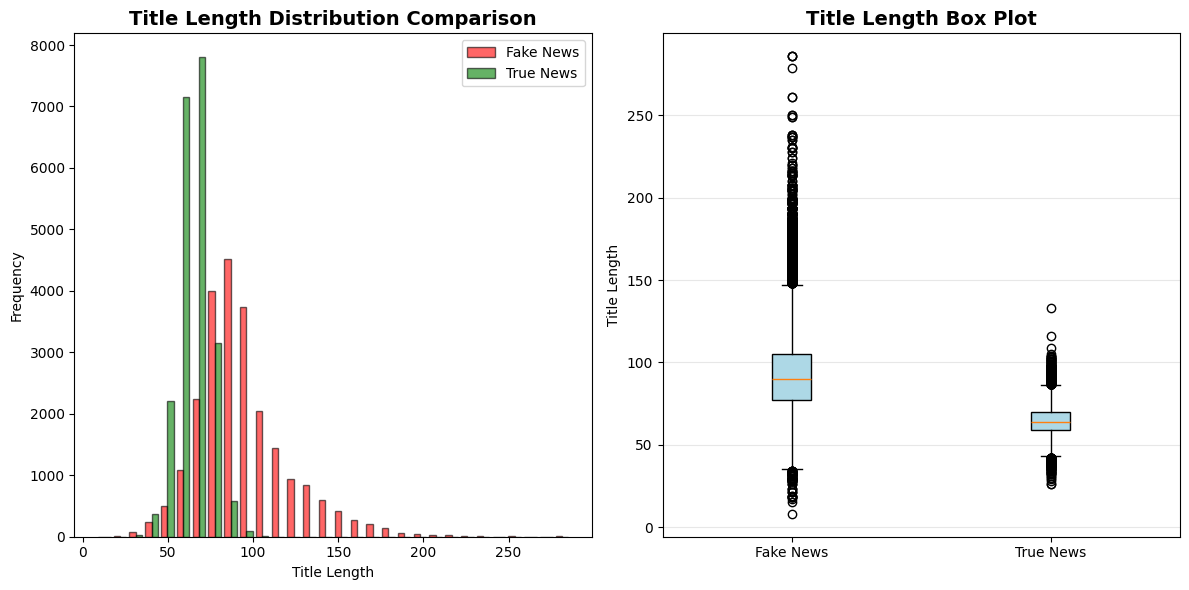

In [42]:
# Visualize title length comparison
plt.figure(figsize=(12, 6))

fake_title_length = fake_data['title'].astype(str).str.len()
true_title_length = true_data['title'].astype(str).str.len()

plt.subplot(1, 2, 1)
plt.hist([fake_title_length, true_title_length], 
         bins=30, label=['Fake News', 'True News'], 
         color=['red', 'green'], alpha=0.6, edgecolor='black')
plt.title('Title Length Distribution Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([fake_title_length, true_title_length], 
            labels=['Fake News', 'True News'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Title Length Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Title Length')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

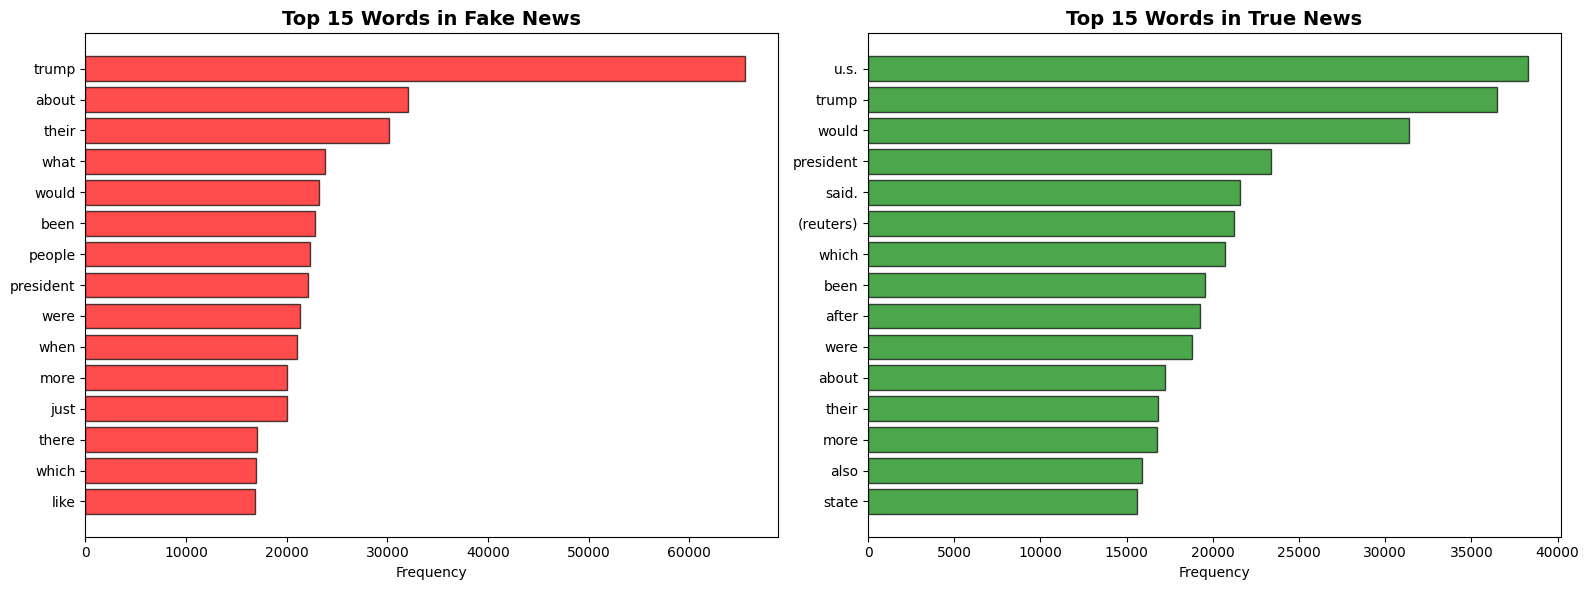

In [43]:
# Visualize top words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Build top words if those variables are not defined yet
if 'fake_top_words' not in globals() or 'true_top_words' not in globals():
	def _get_top_words(dataframe, column='text', n=15):
		text = ' '.join(dataframe[column].astype(str).values).lower()
		words = pd.Series(text.split())
		stop_words = {
			'the', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'and', 'is', 'it',
			'that', 'this', 'with', 'as', 'was', 'by', 'be', 'are', 'from', 'or', 'has',
			'have', 'had', 'but', 'not', 'they', 'we', 'you', 'he', 'she', 'can', 'will', 'said'
		}
		words = words[(words.str.len() > 3) & (~words.isin(stop_words))]
		return list(words.value_counts().head(n).items())

	fake_top_words = _get_top_words(fake_data, 'text', 15)
	true_top_words = _get_top_words(true_data, 'text', 15)

# Fake news top words
fake_words, fake_counts = zip(*fake_top_words[:15])
axes[0].barh(fake_words, fake_counts, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('Top 15 Words in Fake News', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# True news top words
true_words, true_counts = zip(*true_top_words[:15])
axes[1].barh(true_words, true_counts, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Top 15 Words in True News', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## EDA Summary
Key insights from the exploratory data analysis:
- **Dataset Size**: Both datasets contain thousands of news articles
- **Missing Values**: Check if there are any null values in the datasets
- **Class Distribution**: The dataset appears balanced between fake and true news
- **Text Length**: Average character and word counts differ between fake and true news
- **Subject Distribution**: News articles cover various topics/subjects
- **Common Words**: Certain words appear more frequently in fake vs true news articles

These insights help us understand the data better before building the classification models.

In [44]:
# Function to get most common words
from collections import Counter

def get_top_words(dataframe, column, n=20):
    text = ' '.join(dataframe[column].values).lower()
    words = text.split()
    # Remove common stop words
    stop_words = {'the', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'of', 'and', 'is', 'it', 'that', 'this', 'with', 'as', 'was', 'by', 'be', 'are', 'from', 'or', 'has', 'have', 'had', 'but', 'not', 'they', 'we', 'you', 'he', 'she', 'can', 'will', 'said'}
    filtered_words = [word for word in words if word not in stop_words and len(word) > 3]
    return Counter(filtered_words).most_common(n)

# Get top words
fake_top_words = get_top_words(fake_data, 'text', 20)
true_top_words = get_top_words(true_data, 'text', 20)

print("Top 20 words in Fake News:")
for word, count in fake_top_words:
    print(f"{word}: {count}")
    
print("\n" + "="*50 + "\n")
print("Top 20 words in True News:")
for word, count in true_top_words:
    print(f"{word}: {count}")

Top 20 words in Fake News:
trump: 65511
about: 32073
their: 30164
what: 23849
would: 23261
been: 22811
people: 22359
president: 22080
were: 21368
when: 20982
more: 20020
just: 20005
there: 17079
which: 16926
like: 16858
donald: 16800
after: 16577
obama: 16043
clinton: 15614
because: 15157


Top 20 words in True News:
u.s.: 38276
trump: 36485
would: 31361
president: 23399
said.: 21583
(reuters): 21239
which: 20707
been: 19541
after: 19241
were: 18811
about: 17220
their: 16797
more: 16747
also: 15870
state: 15608
united: 15521
government: 15319
house: 14550
republican: 14500
told: 14221


## Most Common Words Analysis

In [45]:
# Calculate title length
fake_data['title_length'] = fake_data['title'].apply(len)
true_data['title_length'] = true_data['title'].apply(len)

# Compare average title length
print(f"Average title length in Fake News: {fake_data['title_length'].mean():.2f}")
print(f"Average title length in True News: {true_data['title_length'].mean():.2f}")

Average title length in Fake News: 94.20
Average title length in True News: 64.67


## Title Length Analysis

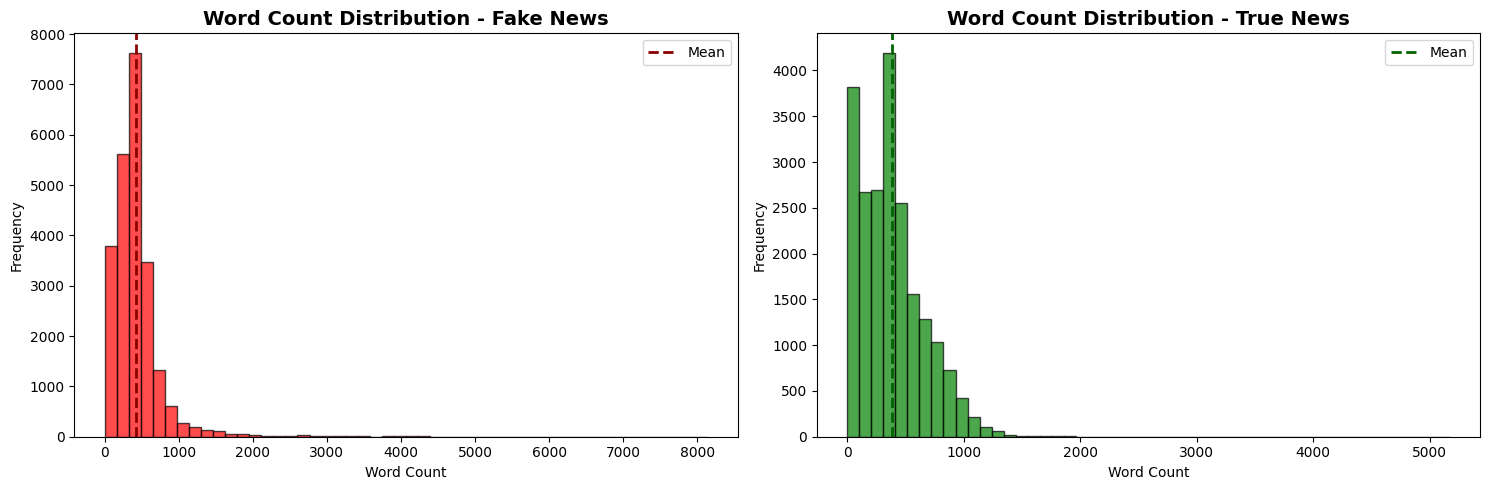

In [46]:
# Ensure word_count exists before plotting
if 'word_count' not in fake_data.columns:
	fake_data['word_count'] = fake_data['text'].apply(lambda x: len(str(x).split()))
if 'word_count' not in true_data.columns:
	true_data['word_count'] = true_data['text'].apply(lambda x: len(str(x).split()))

# Visualize word count comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(fake_data['word_count'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('Word Count Distribution - Fake News', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].axvline(fake_data['word_count'].mean(), color='darkred', linestyle='--', linewidth=2, label='Mean')
axes[0].legend()

axes[1].hist(true_data['word_count'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Word Count Distribution - True News', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].axvline(true_data['word_count'].mean(), color='darkgreen', linestyle='--', linewidth=2, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

In [47]:
# Calculate word count
fake_data['word_count'] = fake_data['text'].apply(lambda x: len(str(x).split()))
true_data['word_count'] = true_data['text'].apply(lambda x: len(str(x).split()))

print("Fake News Word Count Statistics:")
print(fake_data['word_count'].describe())
print("\n" + "="*50 + "\n")
print("True News Word Count Statistics:")
print(true_data['word_count'].describe())

Fake News Word Count Statistics:
count    23481.000000
mean       423.197905
std        408.388890
min          0.000000
25%        240.000000
50%        363.000000
75%        506.000000
max       8135.000000
Name: word_count, dtype: float64


True News Word Count Statistics:
count    21417.000000
mean       385.640099
std        274.006204
min          0.000000
25%        148.000000
50%        359.000000
75%        525.000000
max       5172.000000
Name: word_count, dtype: float64


## Word Count Analysis

<Figure size 1000x600 with 0 Axes>

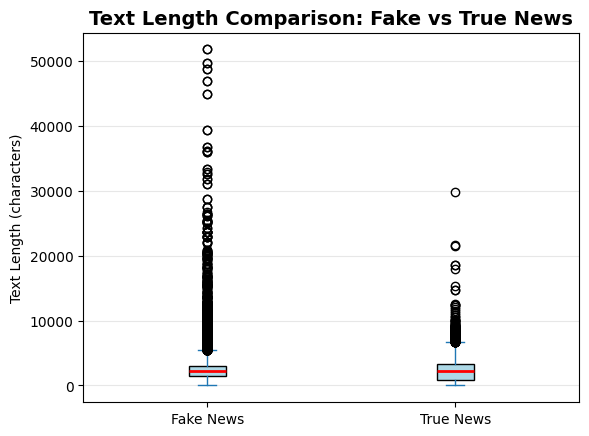

In [48]:
# Ensure text_length exists before plotting
if 'text_length' not in fake_data.columns:
    fake_data['text_length'] = fake_data['text'].apply(len)
if 'text_length' not in true_data.columns:
    true_data['text_length'] = true_data['text'].apply(len)

# Box plot comparison
plt.figure(figsize=(10, 6))
data_for_box = pd.DataFrame({
    'Fake News': fake_data['text_length'],
    'True News': true_data['text_length']
})
data_for_box.plot(kind='box', patch_artist=True, 
                   boxprops=dict(facecolor='lightblue'),
                   medianprops=dict(color='red', linewidth=2))
plt.title('Text Length Comparison: Fake vs True News', fontsize=14, fontweight='bold')
plt.ylabel('Text Length (characters)')
plt.grid(axis='y', alpha=0.3)
plt.show()

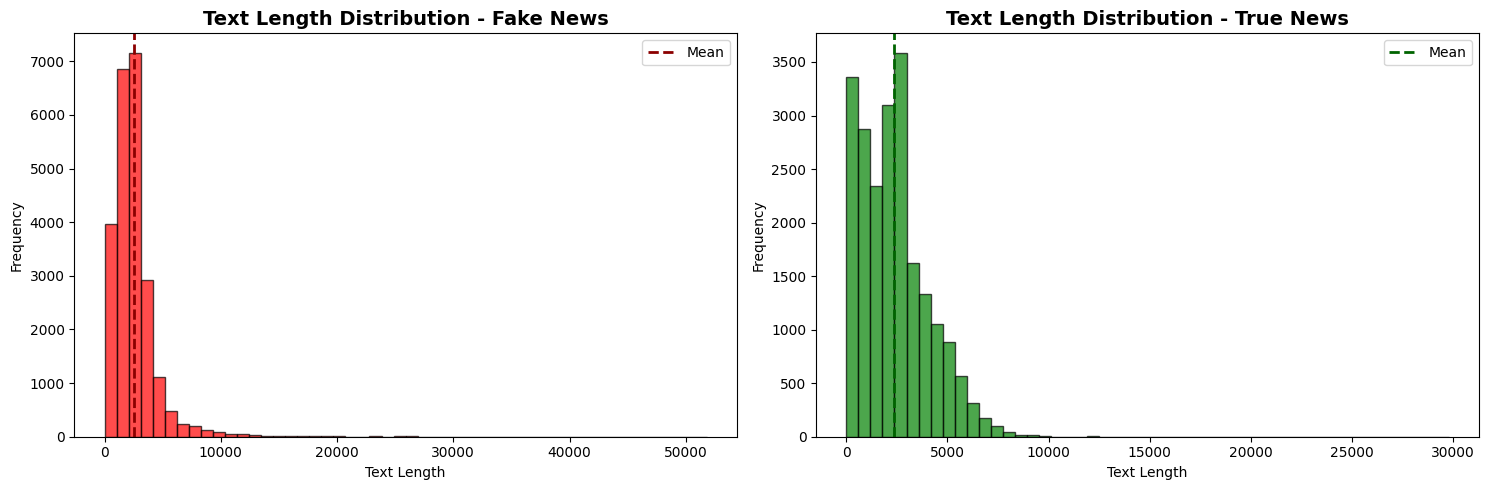

In [49]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fake news text length
axes[0].hist(fake_data['text_length'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('Text Length Distribution - Fake News', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')
axes[0].axvline(fake_data['text_length'].mean(), color='darkred', linestyle='--', linewidth=2, label='Mean')
axes[0].legend()

# True news text length
axes[1].hist(true_data['text_length'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Text Length Distribution - True News', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Text Length')
axes[1].set_ylabel('Frequency')
axes[1].axvline(true_data['text_length'].mean(), color='darkgreen', linestyle='--', linewidth=2, label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

In [50]:
# Calculate text length
fake_data['text_length'] = fake_data['text'].apply(len)
true_data['text_length'] = true_data['text'].apply(len)

# Statistical summary of text length
print("Fake News Text Length Statistics:")
print(fake_data['text_length'].describe())
print("\n" + "="*50 + "\n")
print("True News Text Length Statistics:")
print(true_data['text_length'].describe())

Fake News Text Length Statistics:
count    23481.000000
mean      2547.396235
std       2532.884399
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: text_length, dtype: float64


True News Text Length Statistics:
count    21417.000000
mean      2383.278517
std       1684.835730
min          1.000000
25%        914.000000
50%       2222.000000
75%       3237.000000
max      29781.000000
Name: text_length, dtype: float64


## Text Length Analysis

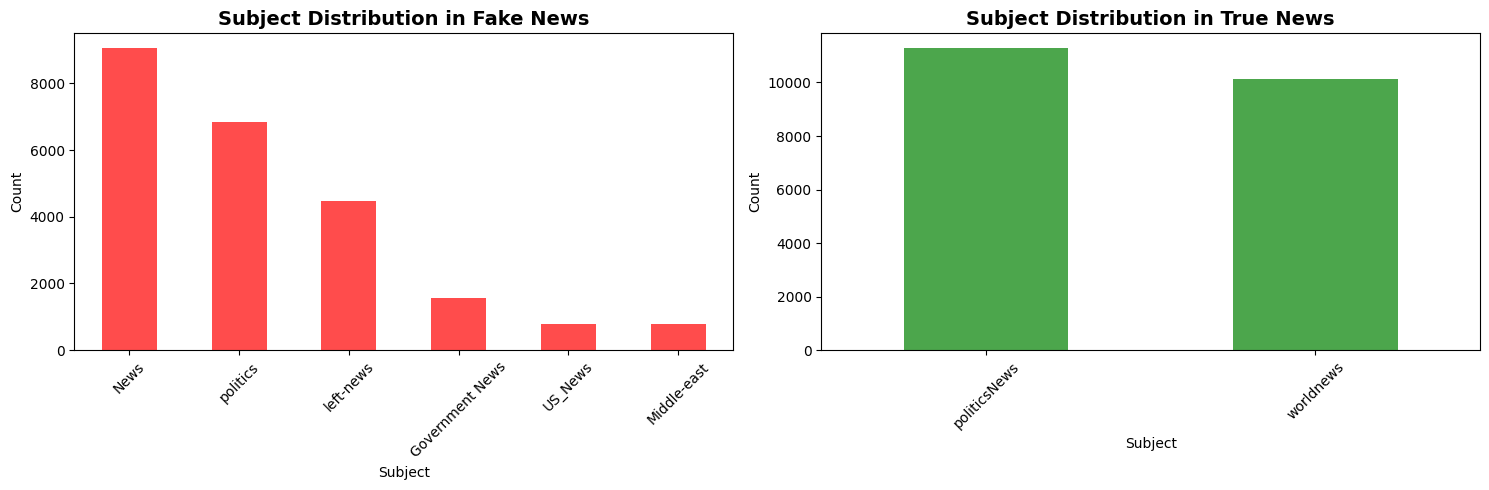

In [51]:
# Visualize subject distribution
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fake news subject distribution
fake_data['subject'].value_counts().plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Subject Distribution in Fake News', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subject')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# True news subject distribution
true_data['subject'].value_counts().plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Subject Distribution in True News', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Subject')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [52]:
# Subject distribution in Fake news
print("Subject distribution in Fake news:")
print(fake_data['subject'].value_counts())
print("\n" + "="*50 + "\n")
print("Subject distribution in True news:")
print(true_data['subject'].value_counts())

Subject distribution in Fake news:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


Subject distribution in True news:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


## Subject Distribution Analysis

In [53]:
# Check for duplicate rows
print(f"Duplicate rows in Fake news: {fake_data.duplicated().sum()}")
print(f"Duplicate rows in True news: {true_data.duplicated().sum()}")

Duplicate rows in Fake news: 3
Duplicate rows in True news: 206


In [54]:
# Check for missing values
print("Missing values in Fake news dataset:")
print(fake_data.isnull().sum())
print("\n" + "="*50 + "\n")
print("Missing values in True news dataset:")
print(true_data.isnull().sum())

Missing values in Fake news dataset:
title           0
text            0
subject         0
date            0
title_length    0
word_count      0
text_length     0
dtype: int64


Missing values in True news dataset:
title           0
text            0
subject         0
date            0
title_length    0
word_count      0
text_length     0
dtype: int64


In [55]:
# Check data types and info
print("Fake Data Info:")
print(fake_data.info())
print("\n" + "="*50 + "\n")
print("True Data Info:")
print(true_data.info())

Fake Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   title         23481 non-null  str  
 1   text          23481 non-null  str  
 2   subject       23481 non-null  str  
 3   date          23481 non-null  str  
 4   title_length  23481 non-null  int64
 5   word_count    23481 non-null  int64
 6   text_length   23481 non-null  int64
dtypes: int64(3), str(4)
memory usage: 1.3 MB
None


True Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   title         21417 non-null  str  
 1   text          21417 non-null  str  
 2   subject       21417 non-null  str  
 3   date          21417 non-null  str  
 4   title_length  21417 non-null  int64
 5   word_count    21417 non-null  int64
 6   text_length   21417

In [56]:
# Check the shape of datasets
print(f"Fake news dataset shape: {fake_data.shape}")
print(f"True news dataset shape: {true_data.shape}")

Fake news dataset shape: (23481, 7)
True news dataset shape: (21417, 7)


In [57]:
true_data.head()

,title,text,subject,date,title_length,word_count,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",64,749,4659
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",64,624,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",60,457,2789
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",59,376,2461
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",69,852,5204


## Dataset Overview

# Exploratory Data Analysis (EDA)
Understanding the data through statistical analysis and visualizations.

## Data Labeling
Adding class labels to distinguish between fake (0) and true (1) news.

In [58]:
fake_data['class'] = 0
true_data['class'] = 1

In [59]:
fake_data.shape, true_data.shape

((23481, 8), (21417, 8))

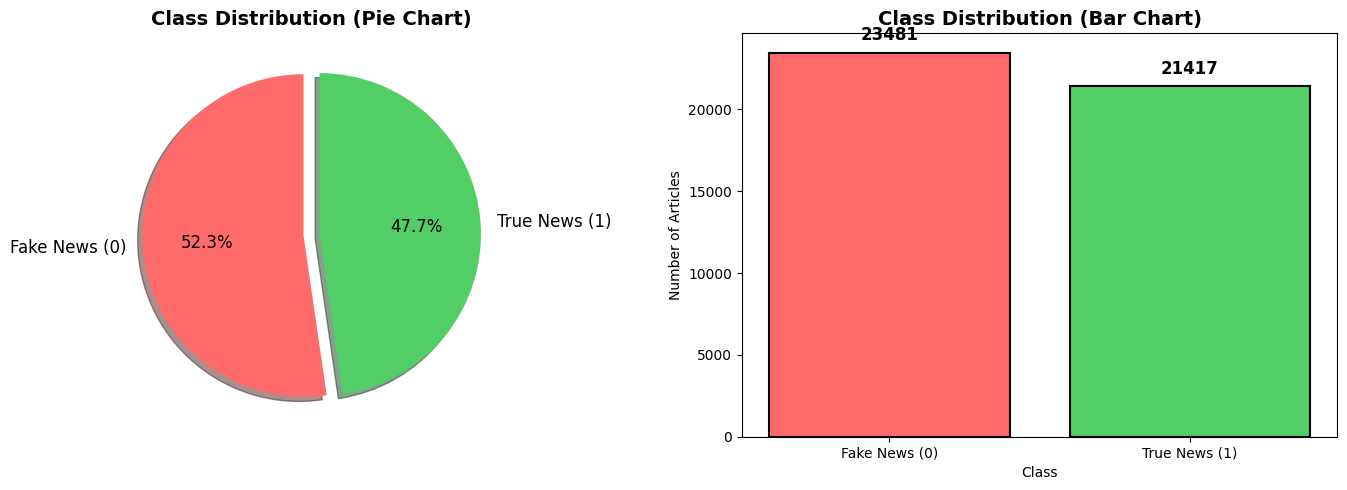

Total Fake News articles: 23481
Total True News articles: 21417
Total articles: 44898
Dataset balance ratio (Fake:True): 1.10:1


In [60]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
class_counts = [fake_data.shape[0], true_data.shape[0]]
labels = ['Fake News (0)', 'True News (1)']
colors = ['#ff6b6b', '#51cf66']
explode = (0.05, 0.05)

axes[0].pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, explode=explode, shadow=True, textprops={'fontsize': 12})
axes[0].set_title('Class Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(labels, class_counts, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Class Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Articles')
axes[1].set_xlabel('Class')
for i, v in enumerate(class_counts):
    axes[1].text(i, v + 500, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total Fake News articles: {fake_data.shape[0]}")
print(f"Total True News articles: {true_data.shape[0]}")
print(f"Total articles: {fake_data.shape[0] + true_data.shape[0]}")
print(f"Dataset balance ratio (Fake:True): {fake_data.shape[0]/true_data.shape[0]:.2f}:1")

## Class Distribution Visualization

## Prepare Manual Testing Data
Separating the last 10 samples from each dataset for manual testing later.

In [61]:
fake_data_manual_testing = fake_data.tail(10)
for i in range(fake_data.index.max(), fake_data.index.max() - 10, -1):
  fake_data.drop([i], axis = 0, inplace = True)

true_data_manual_testing = true_data.tail(10)
for i in range(true_data.index.max(), true_data.index.max() - 10, -1):
  true_data.drop([i], axis = 0, inplace = True)

In [62]:
fake_data.shape, true_data.shape

((23471, 8), (21407, 8))

In [63]:
fake_data_manual_testing.head(10)

,title,text,subject,date,title_length,word_count,text_length,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",67,259,1490,0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",29,1304,8002,0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",86,499,3280,0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",41,1158,7316,0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",62,767,4709,0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",61,522,3237,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",81,297,1684,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",85,4171,25065,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",67,456,2685,0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",81,874,5251,0


In [64]:
true_data_manual_testing.head(10)

,title,text,subject,date,title_length,word_count,text_length,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",55,319,1958,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",58,706,4308,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",60,666,4141,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",66,301,1741,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",76,455,2906,1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",61,466,2821,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",52,125,800,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",49,320,1950,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",61,205,1199,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",52,210,1338,1


## Data Merging & Cleaning
Combining fake and true datasets, then removing unnecessary columns.

In [65]:
merge_data = pd.concat([fake_data, true_data], axis = 0) # axis = 0 means row-wise merge and 1 means columns
merge_data.head(10)

,title,text,subject,date,title_length,word_count,text_length,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",79,495,2893,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",69,305,1898,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",90,580,3597,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",78,444,2774,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",70,420,2346,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",82,312,1741,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",83,352,2166,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",87,376,2224,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",102,457,2772,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",81,286,1644,0


In [66]:
merge_data.columns

Index(['title', 'text', 'subject', 'date', 'title_length', 'word_count',
       'text_length', 'class'],
      dtype='str')

In [67]:
data = merge_data.drop(['title', 'subject', 'date'], axis = 1)
data.head()

,text,title_length,word_count,text_length,class
0,Donald Trump just couldn t wish all Americans ...,79,495,2893,0
1,House Intelligence Committee Chairman Devin Nu...,69,305,1898,0
2,"On Friday, it was revealed that former Milwauk...",90,580,3597,0
3,"On Christmas day, Donald Trump announced that ...",78,444,2774,0
4,Pope Francis used his annual Christmas Day mes...,70,420,2346,0


In [68]:
data.isnull().sum()

text            0
title_length    0
word_count      0
text_length     0
class           0
dtype: int64

## Data Shuffling & Index Reset
Shuffling the dataset randomly and resetting the index for proper ordering.

In [69]:
data = data.sample(frac = 1) # Data store Random wise
data.head()

,text,title_length,word_count,text_length,class
18893,Trump commented about it during the reception:...,115,98,561,0
2620,Donald Trump is crazy. I don t say this flippa...,71,448,2577,0
6995,Ted Cruz is a dangerous extremist who regularl...,84,565,3402,0
21497,The liberal pundits are pretty frustrated by t...,91,13,80,0
6411,MOSCOW (Reuters) - The Kremlin says U.S. intel...,67,970,6212,1


In [70]:
data.reset_index(inplace = True) #inplace for ignore create a new memory
data.drop(['index'], axis = 1, inplace = True)
data.columns

Index(['text', 'title_length', 'word_count', 'text_length', 'class'], dtype='str')

In [71]:
data.head()

,text,title_length,word_count,text_length,class
0,Trump commented about it during the reception:...,115,98,561,0
1,Donald Trump is crazy. I don t say this flippa...,71,448,2577,0
2,Ted Cruz is a dangerous extremist who regularl...,84,565,3402,0
3,The liberal pundits are pretty frustrated by t...,91,13,80,0
4,MOSCOW (Reuters) - The Kremlin says U.S. intel...,67,970,6212,1


## Text Preprocessing
Creating a function to clean and preprocess text data by:
- Converting to lowercase
- Removing special characters, URLs, HTML tags
- Removing punctuation and numbers

In [72]:
def word_drop(text):
  text = text.lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r"\W", " ", text)
  text = re.sub(r'https?://\s+|www\.\s+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  return text

In [73]:
data['text'] = data['text'].apply(word_drop)

In [74]:
x = data['text']
y = data['class']

## Split Data & Feature Extraction
Splitting the data into features (X) and labels (y), then using TF-IDF vectorization for text to numerical conversion.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Model Training & Evaluation
Training multiple classification models and evaluating their performance.

In [77]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 1. Logistic Regression Model

In [78]:
pred_lr = LR.predict(xv_test)

In [79]:
LR.score(xv_test, y_test)

0.9860071301247771

In [80]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5860
           1       0.98      0.99      0.99      5360

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [81]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

### 2. Decision Tree Classifier

In [82]:
pred_dt = DT.predict(xv_test)

In [83]:
DT.score(xv_test, y_test)

0.9950089126559715

In [84]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5860
           1       0.99      1.00      0.99      5360

    accuracy                           1.00     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       1.00      1.00      1.00     11220



In [85]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(xv_train, y_train)

KeyboardInterrupt: 

### 3. Gradient Boosting Classifier

In [ ]:
predit_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, predit_gbc))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

### 4. Random Forest Classifier

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

In [ ]:
def output_lable(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Not A Fake News"

## Manual Testing
Testing the models with custom news articles to see predictions from all 4 models.

In [ ]:
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(word_drop)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_GBC = GBC.predict(new_xv_test)
  pred_RFC = RFC.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                           output_lable(pred_DT[0]),
                                                                                                           output_lable(pred_GBC[0]),
                                                                                                           output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)